# bw hyperparameters

In [45]:
# import sys
# sys.path.append("/home/jgould/Documents/Bubblewrap/scripts/")
# from optim import evaluate

from ax.storage.json_store.load import load_experiment
import ax
from ax.service.ax_client import AxClient

from ax.plot.scatter import (
    interact_fitted,
    plot_objective_vs_constraints,
    tile_fitted,
)

In [46]:
ax_client = AxClient.load_from_json_file("ax_bw_2step_mse_snapshot.json");

[INFO 09-27 14:24:28] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.


In [47]:
df = ax_client.get_trials_data_frame()
df

,trial_index,arm_name,trial_status,generation_method,bw_log_pred_pr,regression_mse,runtime,num,B_thresh,eps
0,0,0_0,COMPLETED,Sobol,-9.308036,213.472778,52.350973,1900,-21.531696,9.433550e-01
1,1,1_0,COMPLETED,Sobol,-0.420117,117.333333,7.019580,107,-23.989040,6.080800e-10
2,2,2_0,COMPLETED,Sobol,-0.358055,123.852222,9.133398,510,-21.857651,6.776037e-06
3,3,3_0,COMPLETED,Sobol,-0.601512,152.608889,7.594348,7,-5.861232,1.256564e-04
4,4,4_0,COMPLETED,Sobol,-0.006889,130.675000,9.233306,44,-20.938960,1.781269e-06
...,...,...,...,...,...,...,...,...,...,...
127,127,127_0,COMPLETED,BoTorch,1.498108,100.372778,10.066515,76,-6.804148,1.589038e-05
128,128,128_0,COMPLETED,BoTorch,1.494763,87.098889,7.495114,60,-7.673468,4.742917e-07
129,129,129_0,COMPLETED,BoTorch,-0.282743,165.908333,6.748184,52,-30.000000,1.000000e-10
130,130,130_0,COMPLETED,BoTorch,1.352677,128.722222,7.556388,28,-1.471279,2.071112e-08


<Axes: xlabel='bw_log_pred_pr', ylabel='regression_mse'>

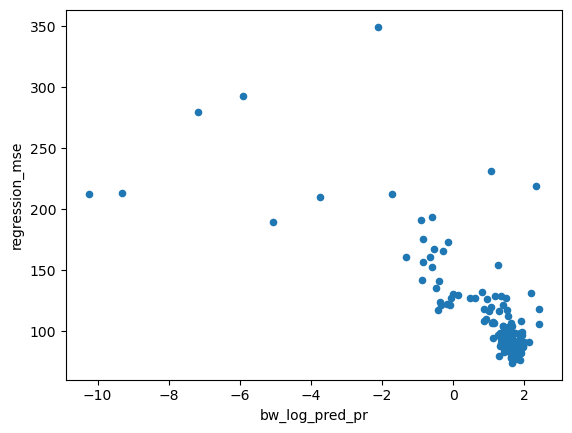

In [48]:
df.plot.scatter("bw_log_pred_pr", "regression_mse")

In [49]:
ax_client.get_next_trial();

[INFO 09-27 14:24:33] ax.service.ax_client: Generated new trial 132 with parameters {'num': 81, 'B_thresh': -7.069398, 'eps': 1e-06}.


In [51]:
%%time
best_parameters, values = ax_client.get_best_parameters(use_model_predictions=True)
print(f"Best parameters: {best_parameters}")
print(f"Corresponding mean: {values[0]}, covariance: {values[1]}")

Best parameters: {'num': 60, 'B_thresh': -6.59005629959783, 'eps': 3.360463736782607e-07}
Corresponding mean: {'runtime': 5.252630477220227, 'bw_log_pred_pr': 1.6628073325883812, 'regression_mse': 84.72715956172924}, covariance: {'runtime': {'runtime': 0.009334329902568378, 'bw_log_pred_pr': 0.0, 'regression_mse': 0.0}, 'bw_log_pred_pr': {'runtime': 0.0, 'bw_log_pred_pr': 0.0008588779135879537, 'regression_mse': 0.0}, 'regression_mse': {'runtime': 0.0, 'bw_log_pred_pr': 0.0, 'regression_mse': 4.7527572696809175}}
CPU times: user 44.3 s, sys: 1.05 s, total: 45.3 s
Wall time: 2.61 s


In [24]:
from ax.utils.notebook.plotting import render

In [25]:
pnames = ["num", "B_thresh", "eps"]

In [26]:
def contour(x, y, z, parameters=best_parameters):
    render(ax.plot.contour.plot_contour(ax_client.generation_strategy.model, x, y, z, slice_values=parameters, lower_is_better=True))

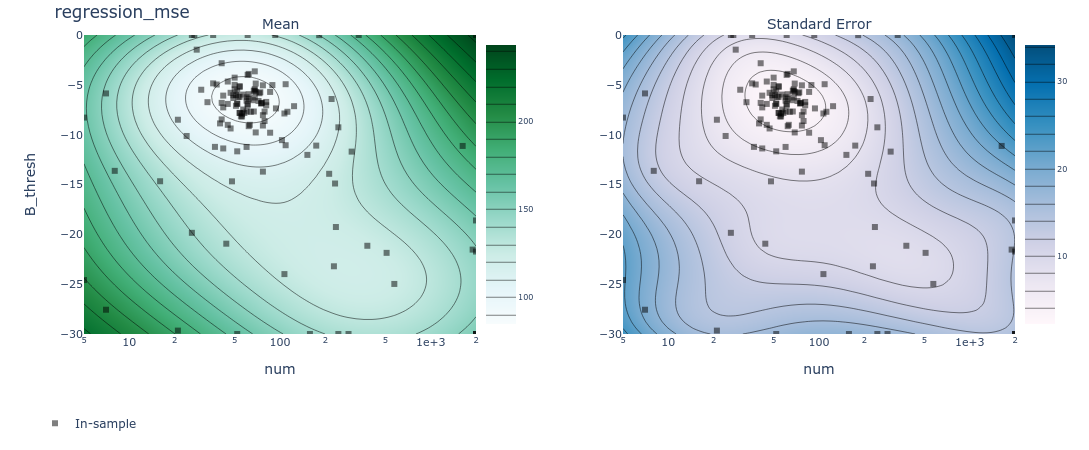

In [27]:
contour(pnames[0], pnames[1], "regression_mse")

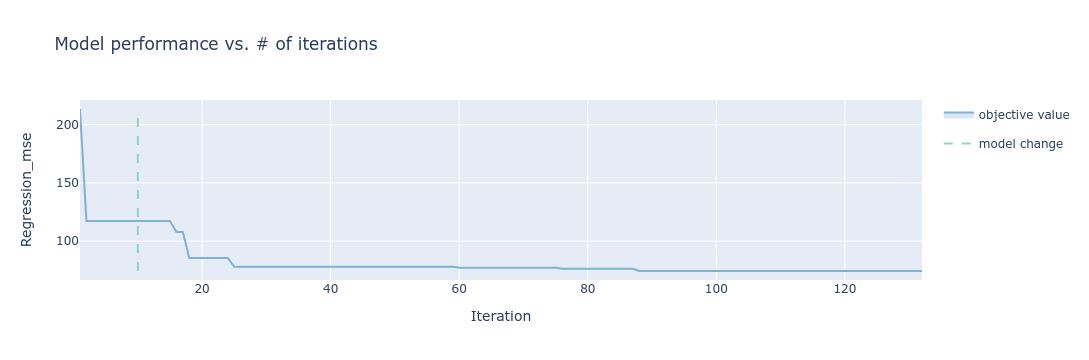

In [28]:
render(ax_client.get_optimization_trace())

In [29]:
from ax.plot.slice import plot_slice

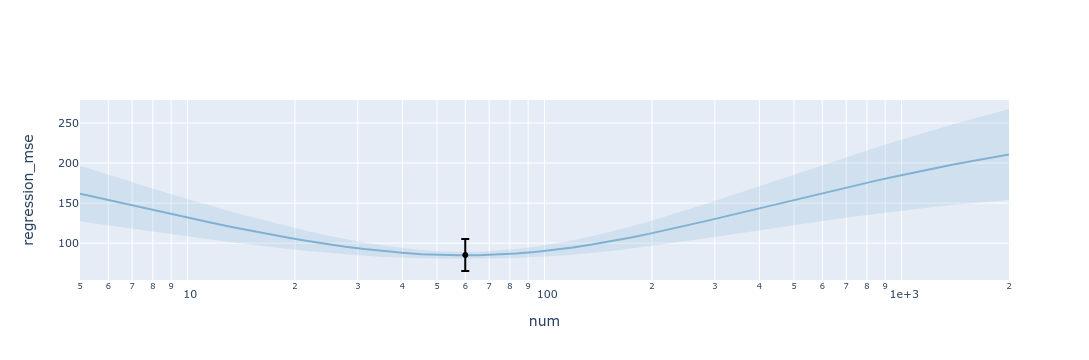

In [30]:
render(plot_slice(ax_client.generation_strategy.model, "num", "regression_mse", slice_values=best_parameters))

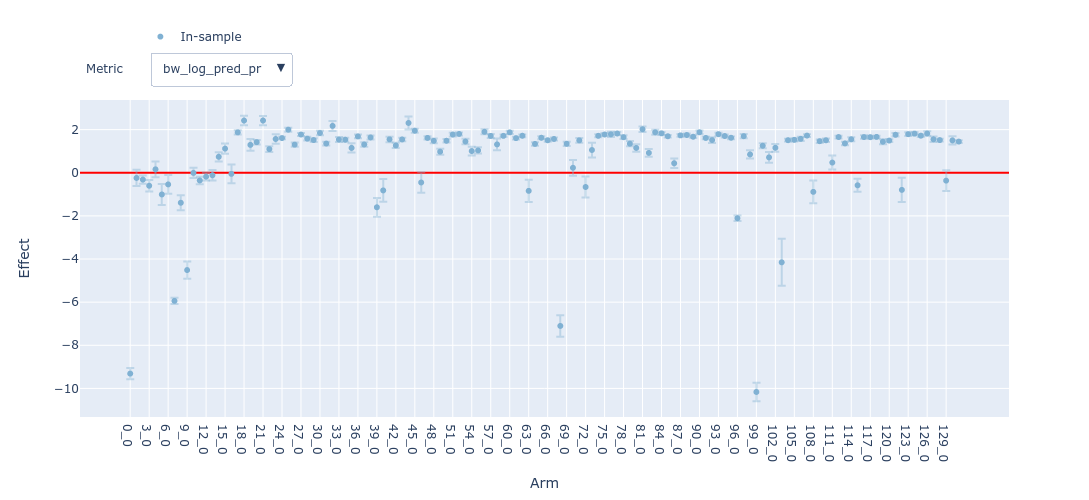

In [31]:
render(interact_fitted(ax_client.generation_strategy.model, rel=False))

# regression hyperparameters

In [52]:
ax_client = AxClient.load_from_json_file("ax_sn_2step_jpca_defaults_snapshot.json");

[INFO 09-27 14:24:51] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 6 decimal points.


In [53]:
df = ax_client.get_trials_data_frame()
df

,trial_index,arm_name,trial_status,generation_method,regression_mse,runtime,forgetting_factor,noise_scale,n_perturbations
0,0,0_0,COMPLETED,Sobol,61.973436,4.666692,0.002591,0.000031,3
1,1,1_0,COMPLETED,Sobol,110.396127,5.767559,0.095125,0.003422,4
2,2,2_0,COMPLETED,Sobol,127.742982,4.738991,0.003862,0.745437,5
3,3,3_0,COMPLETED,Sobol,58870.830317,4.790855,0.111098,0.000070,3
4,4,4_0,COMPLETED,Sobol,63.126054,4.292273,0.000274,0.003066,6
...,...,...,...,...,...,...,...,...,...
92,92,92_0,COMPLETED,BoTorch,61.241223,5.049765,0.000521,0.014590,6
93,93,93_0,COMPLETED,BoTorch,63.414567,4.715305,0.000053,0.000643,1
94,94,94_0,COMPLETED,BoTorch,61.105930,4.988967,0.000023,0.022262,6
95,95,95_0,COMPLETED,BoTorch,135.921140,4.757704,0.000083,1.635010,6


In [54]:
df[df.regression_mse < 70]

,trial_index,arm_name,trial_status,generation_method,regression_mse,runtime,forgetting_factor,noise_scale,n_perturbations
0,0,0_0,COMPLETED,Sobol,61.973436,4.666692,0.002591,0.000031,3
4,4,4_0,COMPLETED,Sobol,63.126054,4.292273,0.000274,0.003066,6
6,6,6_0,COMPLETED,Sobol,63.551808,4.213074,0.000014,0.000127,2
7,7,7_0,COMPLETED,Sobol,63.329073,4.779480,0.000403,0.000044,3
8,8,8_0,COMPLETED,Sobol,63.366175,4.375195,0.000193,0.000163,4
9,9,9_0,COMPLETED,Sobol,63.214251,4.689629,0.000472,0.000073,2
10,10,10_0,COMPLETED,BoTorch,53.560531,4.319033,0.042280,0.035126,5
11,11,11_0,COMPLETED,BoTorch,60.031565,4.132367,0.002540,0.011168,3
12,12,12_0,COMPLETED,BoTorch,49.750316,4.863883,0.113268,0.041643,2
13,13,13_0,COMPLETED,BoTorch,62.985683,4.330186,0.000049,0.006085,2


In [55]:
ax_client.get_next_trial();

[INFO 09-27 14:24:52] ax.service.ax_client: Generated new trial 97 with parameters {'forgetting_factor': 0.004366, 'noise_scale': 0.000159, 'n_perturbations': 1}.


In [64]:
%%time
best_parameters, values = ax_client.get_best_parameters(use_model_predictions=False)
ks = list(values[1].keys())
print(f"Best parameters: {best_parameters}")
print(f"Corresponding mean: {values[0]}, covariance: {np.array([ [values[1][k1][k2] if k2 in values[1][k1] else np.nan for k2 in ks] for k1 in ks ])}")
print(ks)

Best parameters: {'forgetting_factor': 0.11326787864703845, 'noise_scale': 0.041642887676295606, 'n_perturbations': 2}
Corresponding mean: {'runtime': 4.8638833364, 'regression_mse': 49.7503157554}, covariance: [[0.02175336        nan]
 [       nan 4.48394886]]
['runtime', 'regression_mse']
CPU times: user 50.2 ms, sys: 80 µs, total: 50.3 ms
Wall time: 47.5 ms


In [65]:
from ax.utils.notebook.plotting import render

In [66]:
pnames = ["forgetting_factor", "noise_scale", "n_perturbations"]

In [67]:
def contour(x, y, z, parameters=best_parameters):
    render(ax.plot.contour.plot_contour(ax_client.generation_strategy.model, x, y, z, slice_values=parameters, lower_is_better=True))

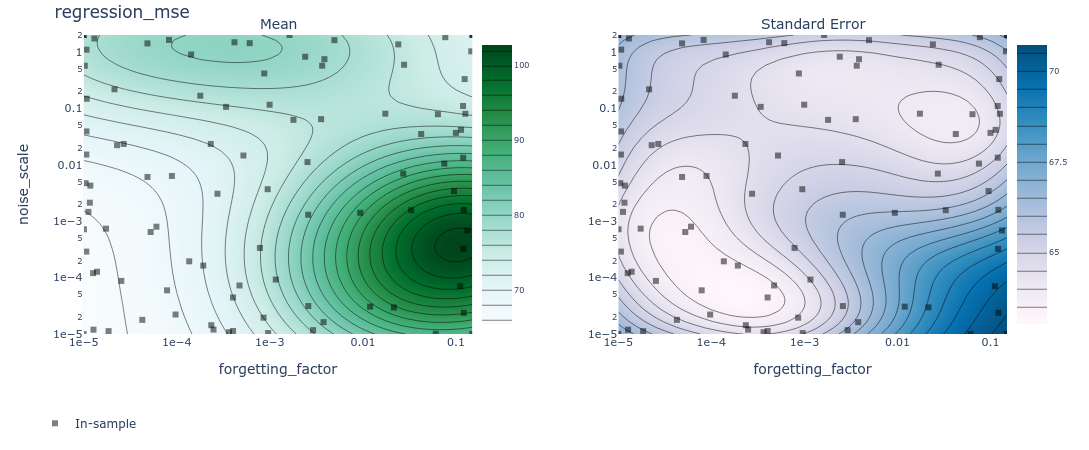

In [68]:
contour(pnames[0], pnames[1], "regression_mse")

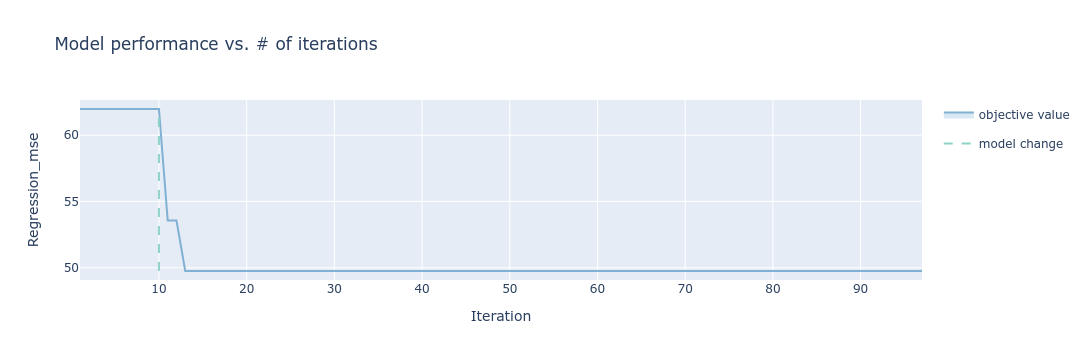

In [15]:
render(ax_client.get_optimization_trace())

In [16]:
from ax.plot.slice import plot_slice

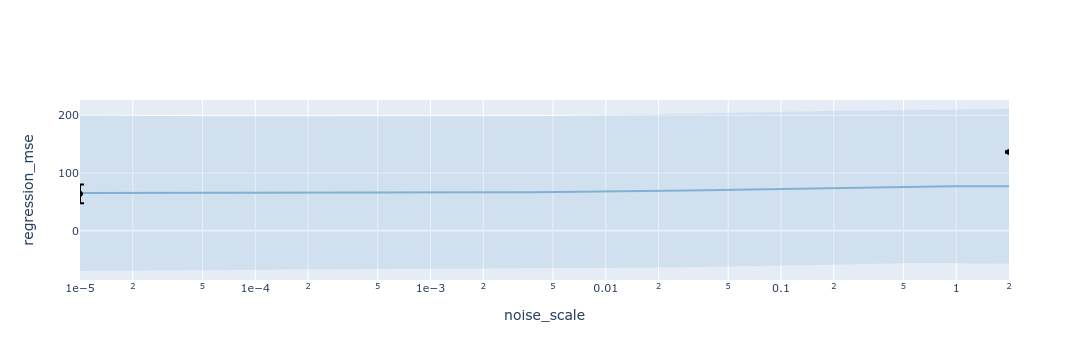

In [17]:
render(plot_slice(ax_client.generation_strategy.model, "noise_scale", "regression_mse", slice_values=best_parameters))

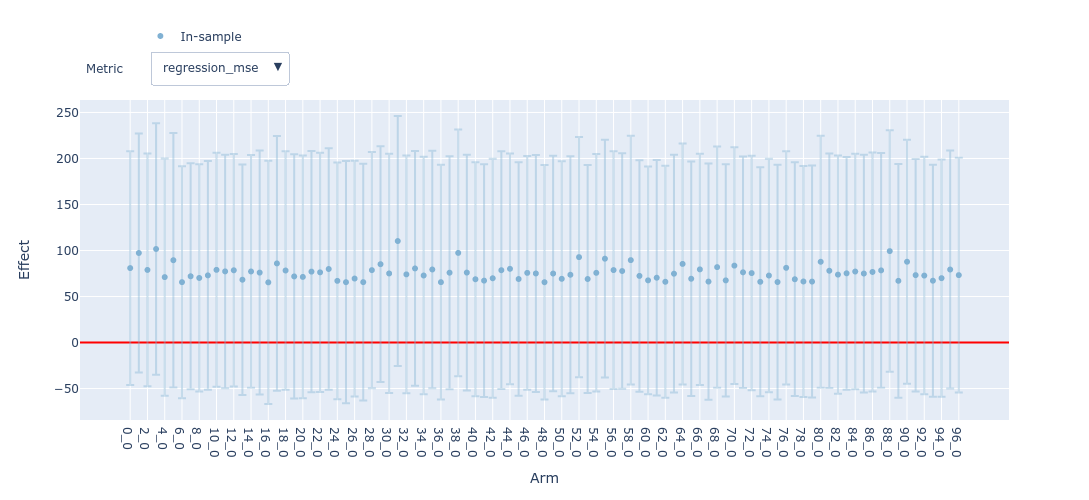

In [18]:
render(interact_fitted(ax_client.generation_strategy.model, rel=False))